In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Read in the salmon raw data file

salmon_file = "Resources/Chinook_Lower_Columbia_Abundance.csv"
raw_salmon_df = pd.read_csv(salmon_file)

raw_salmon_df.head(2)

,ESU,ESU ID,Stratum,Stratum ID,Independent Population,Independent Population ID,spawning_year,Lifestage,WildCount,NOSAEJ,CI_Wild,AbGoal,mile_Surveyed,total_site,AbComments,AbSource,Comments_WildCount
0,Lower Columbia,10116060000,Cascade,50116060302,Clackamas,30116060322,1974,adult,179.0,NaN,NaN,NaN,NaN,NaN,NaN,"Appendix C, LC Recovery Plan, Table B.1-1.",NaN
1,Lower Columbia,10116060000,Cascade,50116060302,Clackamas,30116060322,1975,adult,144.0,NaN,NaN,NaN,NaN,NaN,NaN,"Appendix C, LC Recovery Plan, Table B.1-1.",NaN


In [3]:
# We want to look at the Clackamas poplation since it has a decent data population
clean_salmon_df = raw_salmon_df[
    (raw_salmon_df["Independent Population"] == "Clackamas") & 
    (raw_salmon_df["spawning_year"] > 2004) & (raw_salmon_df["spawning_year"] < 2020)
]
clean_salmon_df = clean_salmon_df.reset_index(drop=True)
clean_salmon_df.head(2)

,ESU,ESU ID,Stratum,Stratum ID,Independent Population,Independent Population ID,spawning_year,Lifestage,WildCount,NOSAEJ,CI_Wild,AbGoal,mile_Surveyed,total_site,AbComments,AbSource,Comments_WildCount
0,Lower Columbia,10116060000,Cascade,50116060302,Clackamas,30116060322,2005,adult,2295.0,2729.0,434.0,NaN,NaN,NaN,Count at North Fork Dam / 0.78 to expand to ar...,Schroeder et al. 2007,NaN
1,Lower Columbia,10116060000,Cascade,50116060302,Clackamas,30116060322,2006,adult,1049.0,1234.0,211.0,NaN,NaN,NaN,Count at North Fork Dam / 0.78 to expand to ar...,Schroeder et al. 2007,NaN


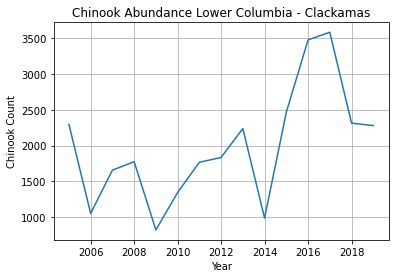

In [4]:
# Let's do a quick line plot
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Chinook Count")
ax.set_title("Chinook Abundance Lower Columbia - Clackamas")
ax.grid(True)
ax.plot(clean_salmon_df["spawning_year"], clean_salmon_df["WildCount"] )